In [47]:
import os
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from matplotlib.colors import ListedColormap

new_path = '/capstor/scratch/cscs/ajayaraj/qtpyt-tests/CNT_AGNR'
os.chdir(new_path)

In [ ]:
def expand_sparse_self_energy(sigma_small, index_active, target_size,
                              target_range):
    """
    Expand a sparse self-energy matrix to a dense matrix of size (target_size, target_size),
    inserting values only at the positions that lie within target_range.

    Parameters
    ----------
    sigma_small : np.ndarray
        (n_active, n_active) self-energy matrix in the active subspace.
    index_active : np.ndarray
        Indices in the full space where the active orbitals reside.
    target_size : int
        Size of the expanded self-energy matrix (typically a lead block size).
    target_range : tuple
        (start, end) range in full space corresponding to the lead region.

    Returns
    -------
    sigma_expanded : np.ndarray
        (target_size, target_size) full-sized self-energy with values inserted at appropriate indices.
    """
    # start, end = target_range
    start, end = 0, target_size
    sigma_expanded = np.zeros((target_size, target_size), dtype=float)

    # Map global indices to local within the lead block
    local_indices = np.array(
        [i - start for i in index_active if start <= i < end])
    if len(local_indices) == 0:
        raise ValueError("No active orbitals found in the target range.")

    for i_new, i_old in enumerate(local_indices):
        for j_new, j_old in enumerate(local_indices):
            sigma_expanded[i_old, j_old] = sigma_small[i_new, j_new]

    return sigma_expanded


In [ ]:
def expand_sparse_self_energy(sigma_small, index_active, target_size, target_range):
    """
    Expand a sparse self-energy matrix to a dense matrix of size (target_size, target_size),
    inserting values only at the positions that lie within target_range.

    Parameters
    ----------
    sigma_small : np.ndarray
        (n_active, n_active) self-energy matrix in the active subspace.
    index_active : np.ndarray
        Indices in the full space where the active orbitals reside.
    target_size : int
        Size of the expanded self-energy matrix (typically a lead block size).
    target_range : tuple
        (start, end) range in full space corresponding to the lead region.

    Returns
    -------
    sigma_expanded : np.ndarray
        (target_size, target_size) full-sized self-energy with values inserted at appropriate indices.
    """
    start, end = target_range
    sigma_expanded = np.zeros((target_size, target_size), dtype=complex)

    # Map global indices to local within the lead block
    local_indices = np.array([i - start for i in index_active if start <= i < end])
    active_indices = np.array([i for i in index_active if start <= i < end])
    if len(local_indices) == 0:
        raise ValueError("No active orbitals found in the target range.")

    for i_small, i_large in enumerate(active_indices):
        for j_small, j_large in enumerate(active_indices):
            sigma_expanded[i_large, j_large] = sigma_small[i_small, j_small]

    return sigma_expanded


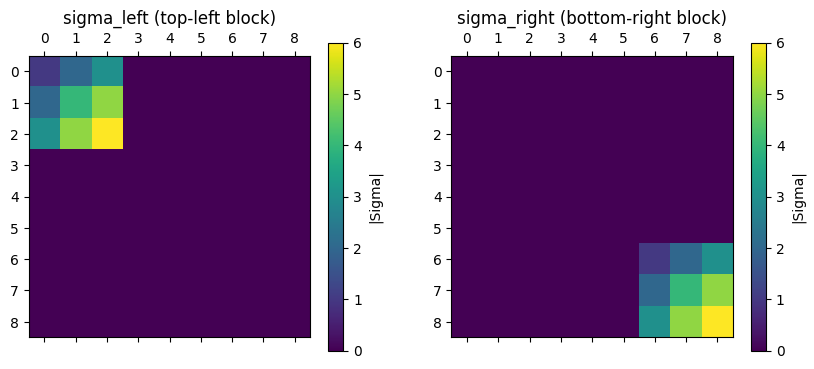

In [49]:
block = np.array([
    [1, 2, 3],
    [2, 4, 5],
    [3, 5, 6]
])

sigma_left = np.zeros((9, 9), dtype=float)
sigma_left[:3, :3] = block

sigma_right = np.zeros((9, 9))
sigma_right[-3:, -3:] = block

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.matshow(np.abs(sigma_left), fignum=0)
plt.colorbar(label="|Sigma|")
plt.title("sigma_left (top-left block)")

plt.subplot(1,2,2)
plt.matshow(np.abs(sigma_right), fignum=0)
plt.colorbar(label="|Sigma|")
plt.title("sigma_right (bottom-right block)")

plt.show()


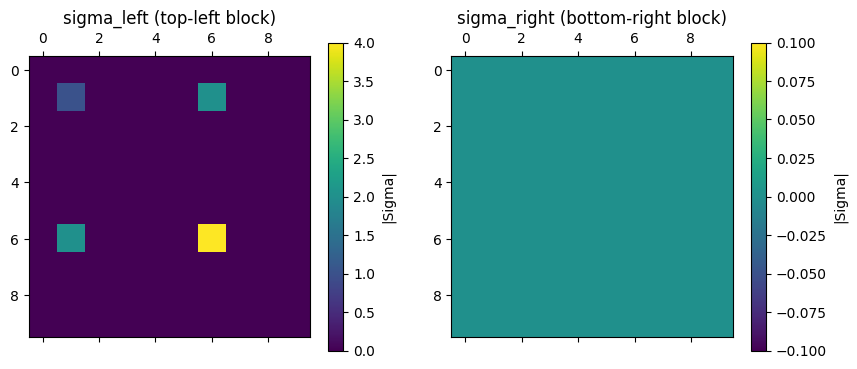

In [50]:
target_range = (0, 10)
target_size = target_range[1] - target_range[0]
index_active_region = np.array([1,6,11])


sigma_left_expanded = expand_sparse_self_energy(
    sigma_small=sigma_left,
    index_active=index_active_region,
    target_size=target_size,
    target_range=target_range
)

sigma_right_expanded = expand_sparse_self_energy(
    sigma_small=sigma_right,
    index_active=index_active_region,
    target_size=target_size,
    target_range=target_range
)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.matshow(np.abs(sigma_left_expanded), fignum=0)
plt.colorbar(label="|Sigma|")
plt.title("sigma_left (top-left block)")

plt.subplot(1,2,2)
plt.matshow(np.abs(sigma_right_expanded), fignum=0)
plt.colorbar(label="|Sigma|")
plt.title("sigma_right (bottom-right block)")

plt.show()

In [37]:
sigma_right_expanded

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [33]:
data_folder = "./unrelaxed/output/no_lowdin/device"
self_energy = np.load(f"{data_folder}/self_energy.npy", allow_pickle=True)
nodes = np.load(f"{data_folder}/nodes.npy")
index_active_region = np.load(f"{data_folder}/index_active_region.npy")
print("self_energy_shape",self_energy[0].shape)
print("nodes",nodes)
print("index active region", index_active_region)


self_energy_shape (648, 648)
nodes [    0  3888  6736 10624]
index active region [    3    12    21 ... 10600 10609 10618]


/tmp/ipykernel_524826/1991721947.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis', 256)


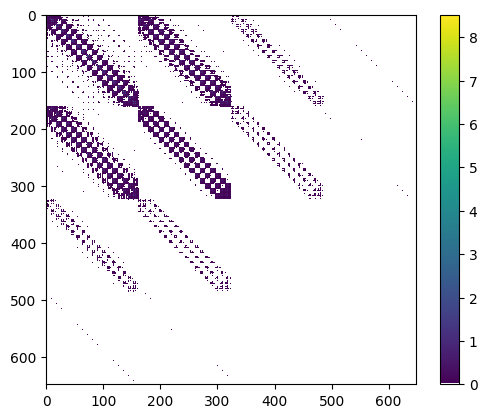

In [ ]:
se = self_energy[0].retarded(0).real

cmap = cm.get_cmap('viridis', 256)
new_colors = cmap(np.linspace(0, 1, 256))
new_colors[0] = [1, 1, 1, 1]  # Set the minimum color to white (RGBA)

new_cmap = ListedColormap(new_colors)

# Plot
plt.imshow(np.abs(se), cmap=new_cmap)
plt.colorbar()
plt.show()


/tmp/ipykernel_64170/128114759.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis', 256)


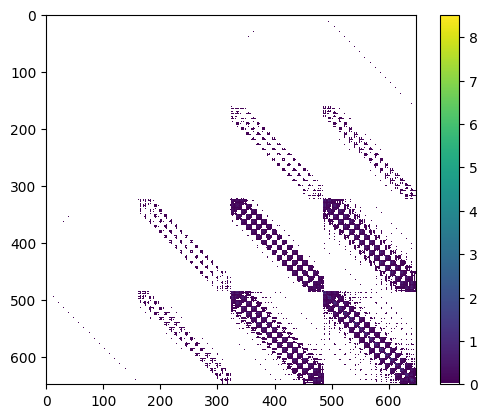

In [8]:
se = self_energy[1].retarded(0).real

cmap = cm.get_cmap('viridis', 256)
new_colors = cmap(np.linspace(0, 1, 256))
new_colors[0] = [1, 1, 1, 1]  # Set the minimum color to white (RGBA)

new_cmap = ListedColormap(new_colors)

# Plot
plt.imshow(np.abs(se), cmap=new_cmap)
plt.colorbar()
plt.show()


In [9]:
sigma_left = expand_sparse_self_energy(
    sigma_small=self_energy[0],
    index_active=index_active_region,
    target_size=nodes[1] - nodes[0],
    target_range=(nodes[0], nodes[1])
)

# sigma_right = expand_sparse_self_energy(
#     sigma_small=self_energy[1].Sigma,
#     index_active=index_active_region,
#     target_size=nodes[3] - nodes[2],
#     target_range=(nodes[2], nodes[3])
# )


TypeError: 'PrincipalSelfEnergy' object is not subscriptable